## TASK 2 : PREDICTION USING UNSUPERVISED ML
### Internship: DSBA - Batch February 2024
### Author: Sirine Ben Mansour


To predict the optimum number of clusters and visualize them using the given Iris dataset, we can use the K-means clustering algorithm.

### Step 1: Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Step 2: Load the Dataset

In [21]:
# Assuming the dataset is stored in a CSV file named 'iris_dataset.csv'
df = pd.read_csv('iris.csv')


### Step 3: Prepare the Data

In [22]:
# Extracting relevant features for clustering (SepalLengthCm and SepalWidthCm in this example)
X = df[['SepalLengthCm', 'SepalWidthCm']].values


### Step 4: Determine Optimal Number of Clusters (K)

One common method to determine the optimum number of clusters is the Elbow Method. It involves running k-means clustering on the dataset for a range of values of k and plotting the sum of squared distances for each k.

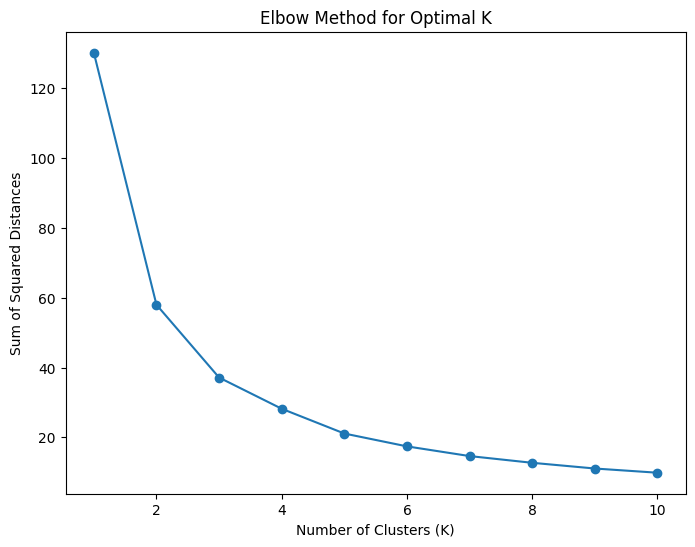

In [23]:
# Using the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

### Step 5: Perform K-means Clustering with Optimal K

Based on the Elbow Method graph, choose the optimal value of k and run k-means clustering on the dataset.

In [24]:
# Choosing the optimal K (e.g., 3 based on the Elbow Method)
optimal_k = 3

# Running K-means clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Adding the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_


### Step 6: Visualize Clusters

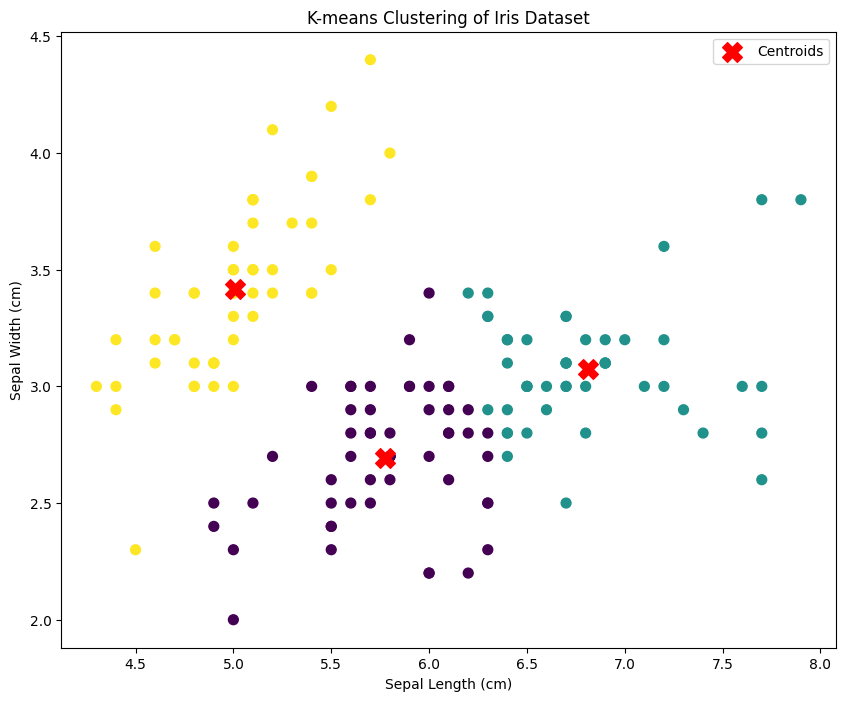

In [25]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

### Step 7: Model Performance Assessment

The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value ranges from -1 to 1, where a higher value indicates better-defined clusters.

In [26]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4434693231245126


A silhouette score of 0.4434693231245126 indicates a moderately good clustering result. 